## Análisis Multivariado de Señales Sismográficas

**Tratamiento de Señales III**

**Facultad de Ingeniería**

**Universidad de Antioquia**

2021


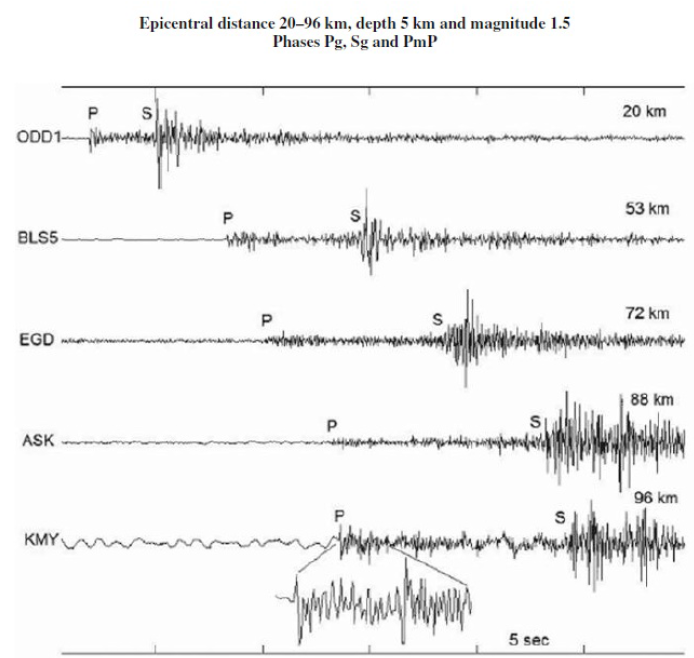

Los observatorios sismológicos clasifican las señales sísmicas de acuerdo a la diferencia de tiempo de arribo entre la onda P y la onda S, conocida como S-P. La S-P, es una indicación de la distancia que existe desde el punto donde se genera el sismo al punto donde se encuentra la estación que lo registra, es decir de la distancia epicentral. Dicho parámetro, aplicado a las señales registradas
por el OSQ permite definir tres tipos de sismos: local, caracterizado por tener una S-P menor a 20 s; regional cuya S-P varía entre 20 s y 180 s y telesismo, cuya S-P es mayor 180 s.

In [4]:
!pip install pyts

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from pyts.decomposition import SingularSpectrumAnalysis
import scipy.io as sc


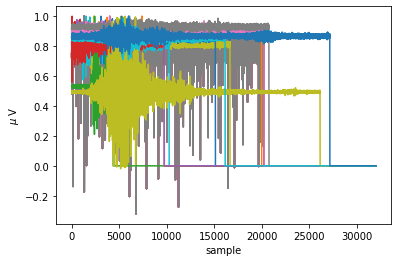

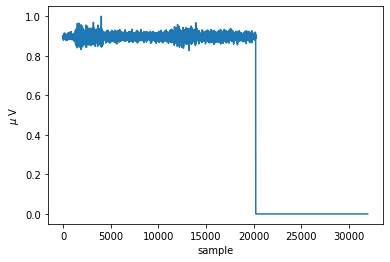

In [6]:
data = sc.loadmat('sisTele.mat')
data.keys() # variables del diccionario

Y = data['Y']
fs = data['fs']

plt.plot(Y.T)
plt.xlabel('sample')
plt.ylabel('$\mu$ V')
plt.show()
sampleSignal = Y[15,:] # se extrae una señal de la base de datos
plt.figure
plt.plot(sampleSignal)
plt.xlabel('sample')
plt.ylabel('$\mu$ V')
plt.show()

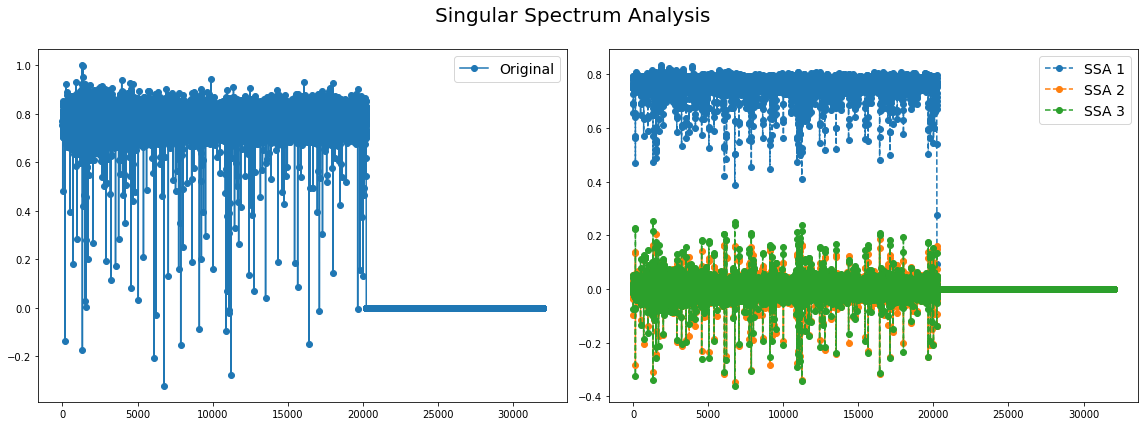

In [7]:
# We decompose the time series into three subseries
X = Y # Conjunto de 21 sismos
groups = 3
# Singular Spectrum Analysis
ssa = SingularSpectrumAnalysis(window_size=groups)
X_ssa = ssa.fit_transform(X)

# Show the results for the first time series and its subseries
plt.figure(figsize=(16, 6))
idSignal = 3
ax1 = plt.subplot(121)
ax1.plot(X[idSignal], 'o-', label='Original')
ax1.legend(loc='best', fontsize=14)

ax2 = plt.subplot(122)

for i in range(groups):
    ax2.plot(X_ssa[idSignal, i], 'o--', label='SSA {0}'.format(i + 1))
ax2.legend(loc='best', fontsize=14)

plt.suptitle('Singular Spectrum Analysis', fontsize=20)

plt.tight_layout()
plt.subplots_adjust(top=0.88)
plt.show()

# The first subseries consists of the trend of the original time series.
# The second and third subseries consist of noise.

(<matplotlib.axes._subplots.AxesSubplot at 0x7f52ba712050>,
 [<matplotlib.lines.Line2D at 0x7f52baa3dcd0>])

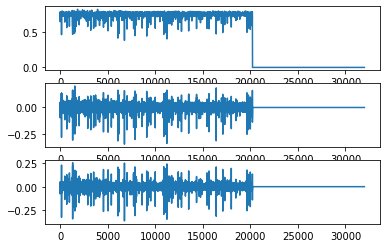

In [8]:
plt.subplot(3,1,1),plt.plot(X_ssa[idSignal, 0])
plt.subplot(3,1,2),plt.plot(X_ssa[idSignal, 1])
plt.subplot(3,1,3),plt.plot(X_ssa[idSignal, 2])

## DataFrames en PANDAS

In [9]:
import pandas as pd

d = {"one": pd.Series([1.0, 2.0, 3.0], index=["a", "b", "c"]),
       "two": pd.Series([1.0, 2.0, 3.0, 4.0], index=["a", "b", "c", "d"]),
     }
 

df = pd.DataFrame(d)

In [10]:
df

,one,two
a,1.0,1.0
b,2.0,2.0
c,3.0,3.0
d,NaN,4.0


In [11]:
import seaborn as sns

penguins = sns.load_dataset("penguins")

In [12]:
penguins

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


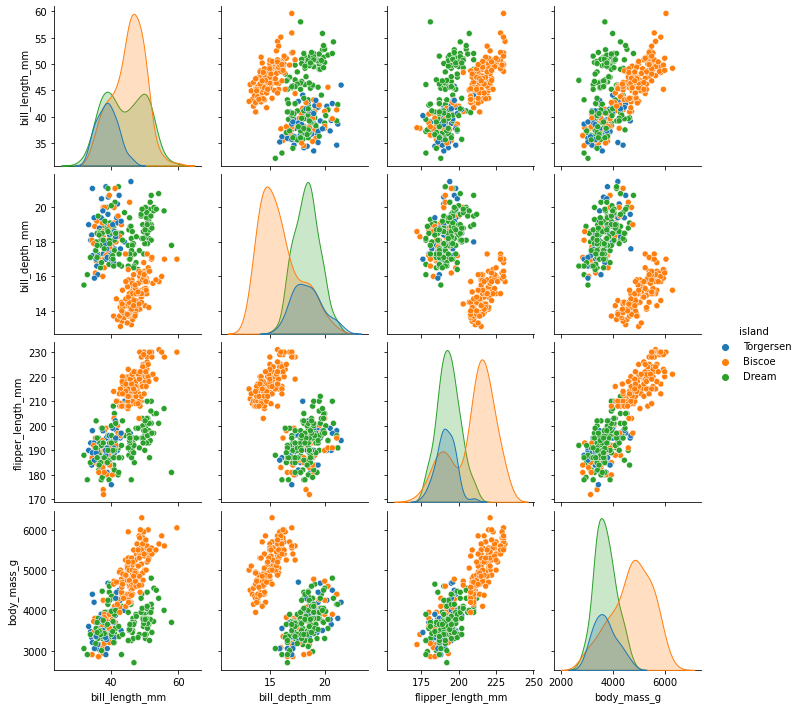

In [13]:
sns.pairplot(penguins, hue="island")

## Numpy Array to DataFrame

In [19]:
X = np.random.randn(63,7)
print(X)

[[-5.44204504e-01 -6.04999293e-01  2.13065284e-01  7.20931619e-01
  -1.80692928e-01 -3.19842528e-01  6.27177917e-01]
 [ 3.99937165e-01 -7.42787206e-01 -1.81626227e-01  3.84681049e-01
   2.48961542e-01  1.40952475e+00  1.17581837e+00]
 [-1.30255558e+00 -1.22811015e+00  1.74838531e+00 -6.38547379e-01
  -1.65653141e+00  5.70242902e-01 -8.89439124e-01]
 [ 3.02026818e-01 -5.99126843e-01  1.51221187e+00  4.03837515e-02
  -3.17661476e-01  7.71306158e-01  5.29068347e-01]
 [-1.39747235e+00  1.92817023e-02  9.65353354e-01  8.50651119e-02
  -1.67955710e+00 -1.94358589e-01  1.17615898e+00]
 [ 1.26681498e-01  8.38169663e-01  2.70156788e-01  1.07557721e+00
  -5.57887447e-01 -3.27094842e+00 -6.75398282e-01]
 [ 1.35140325e-01 -7.68504606e-01  4.19102141e-01  1.39023358e+00
   6.04528435e-01  1.05501860e+00  1.75727326e+00]
 [-5.76551521e-01 -6.62859253e-01 -2.75545971e-01 -6.01894645e-01
  -2.73237485e-02  6.30940668e-01 -2.12212876e-01]
 [ 4.34514836e-01  9.85823022e-01 -1.26810471e+00 -1.55424528e-0

In [20]:
# Dataframe de un nparray
df = pd.DataFrame(X,columns=['Energia','Potencia','F_Pmax','Media','Var','Max','Min'])

In [26]:
df

,Energia,Potencia,F_Pmax,Media,Var,Max,Min
0,-0.544205,-0.604999,0.213065,0.720932,-0.180693,-0.319843,0.627178
1,0.399937,-0.742787,-0.181626,0.384681,0.248962,1.409525,1.175818
2,-1.302556,-1.228110,1.748385,-0.638547,-1.656531,0.570243,-0.889439
3,0.302027,-0.599127,1.512212,0.040384,-0.317661,0.771306,0.529068
4,-1.397472,0.019282,0.965353,0.085065,-1.679557,-0.194359,1.176159
...,...,...,...,...,...,...,...
58,-0.164064,0.675511,1.354257,1.430893,1.746914,0.186361,-0.847585
59,0.738117,0.029988,0.263502,0.931199,-0.693031,-0.203474,-0.255475
60,-0.210156,1.067521,-1.664841,-0.785782,0.426393,1.359587,-0.609491
61,0.272907,-1.607385,0.855915,-1.267739,0.551359,-1.070813,0.710252


In [31]:
Etiquetas = np.zeros((63,1))
Etiquetas[0:21] = 0
Etiquetas[21:42] = 1
Etiquetas[42:] = 2

print(Etiquetas)

[[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]]


In [32]:
df['Etiquetas'] = Etiquetas

In [33]:
df

,Energia,Potencia,F_Pmax,Media,Var,Max,Min,Etiquetas
0,-0.544205,-0.604999,0.213065,0.720932,-0.180693,-0.319843,0.627178,0.0
1,0.399937,-0.742787,-0.181626,0.384681,0.248962,1.409525,1.175818,0.0
2,-1.302556,-1.228110,1.748385,-0.638547,-1.656531,0.570243,-0.889439,0.0
3,0.302027,-0.599127,1.512212,0.040384,-0.317661,0.771306,0.529068,0.0
4,-1.397472,0.019282,0.965353,0.085065,-1.679557,-0.194359,1.176159,0.0
...,...,...,...,...,...,...,...,...
58,-0.164064,0.675511,1.354257,1.430893,1.746914,0.186361,-0.847585,2.0
59,0.738117,0.029988,0.263502,0.931199,-0.693031,-0.203474,-0.255475,2.0
60,-0.210156,1.067521,-1.664841,-0.785782,0.426393,1.359587,-0.609491,2.0
61,0.272907,-1.607385,0.855915,-1.267739,0.551359,-1.070813,0.710252,2.0


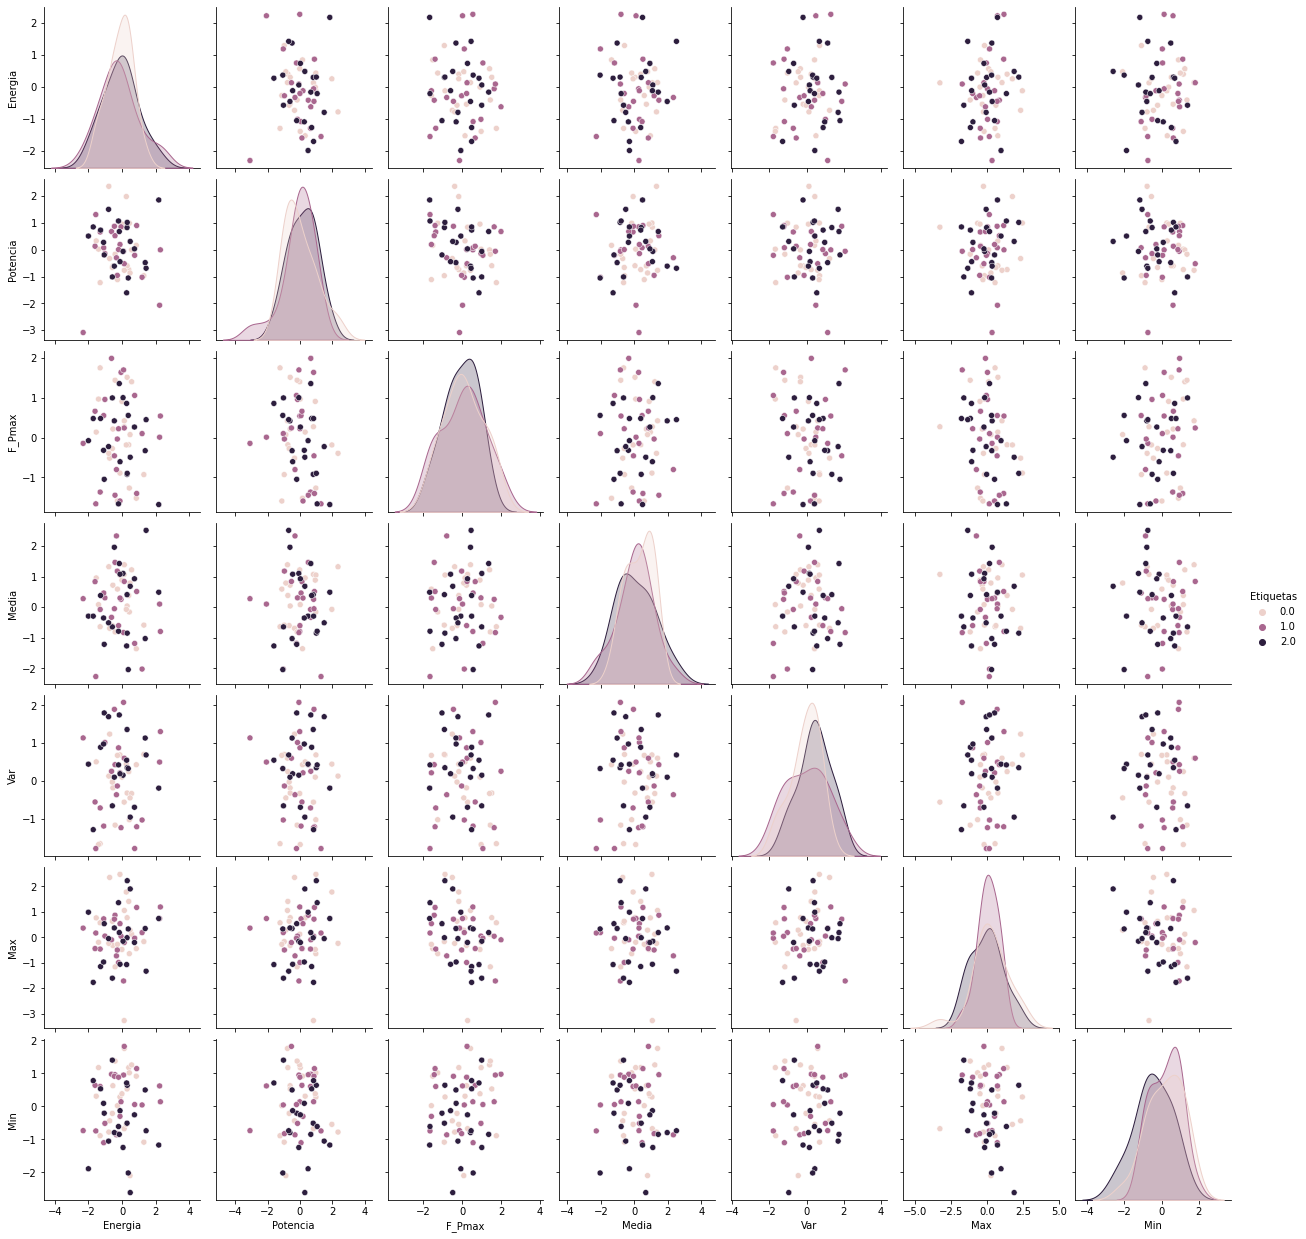

In [34]:
sns.pairplot(df, hue="Etiquetas")